In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("/content/product_inventory.csv")

In [21]:
df = df.rename(columns={
    'product_name': 'ProductName',
    'category': 'Category',
    'subcategory': 'SubCategory',
    'brand': 'Brand',
    'cost_price': 'CostPrice',
    'selling_price': 'SellingPrice',
    'stock_quantity': 'Stock',
    'reorder_level': 'RecorderLevel',
    'supplier_id': 'SupplierID',
    'warehouse_location': 'WareHouse'
})

In [22]:
df.head(3)

,sku,ProductName,Category,SubCategory,Brand,CostPrice,SellingPrice,Stock,RecorderLevel,SupplierID,WareHouse
0,SKU001,Laptop Pro 15,Electronics,Computers,TechBrand,800.0,1299.99,15,5,SUP001,Warehouse A
1,SKU002,Wireless Mouse,Electronics,Accessories,TechBrand,12.5,29.99,45,10,SUP001,Warehouse A
2,SKU003,Office Chair Executive,Furniture,Seating,ComfortPlus,120.0,249.99,8,3,SUP002,Warehouse B


# 🧹 Data Cleaning
Renaming columns and removing extra spaces.

In [23]:
df['SubCategory'] = df['SubCategory'].str.strip()

In [24]:
df['Category'] = df['Category'].str.strip()
df['Brand'] = df['Brand'].str.strip()
df['ProductName'] = df['ProductName'].str.strip()

In [25]:
df.head(3)

,sku,ProductName,Category,SubCategory,Brand,CostPrice,SellingPrice,Stock,RecorderLevel,SupplierID,WareHouse
0,SKU001,Laptop Pro 15,Electronics,Computers,TechBrand,800.0,1299.99,15,5,SUP001,Warehouse A
1,SKU002,Wireless Mouse,Electronics,Accessories,TechBrand,12.5,29.99,45,10,SUP001,Warehouse A
2,SKU003,Office Chair Executive,Furniture,Seating,ComfortPlus,120.0,249.99,8,3,SUP002,Warehouse B


In [26]:
brand_price = df.groupby('Brand')['SellingPrice'].sum()
brand_price

,SellingPrice
Brand,
BrightLight,65.99
ComfortPlus,249.99
EcoBottle,18.99
HomeStyle,12.99
PaperCo,15.99
TechBrand,2629.96
WriteWell,8.99


In [27]:
position_df = df.groupby('WareHouse')['Stock'].sum()
position_df

,Stock
WareHouse,
Warehouse A,179
Warehouse B,27
Warehouse C,101


# 📊 Visualization 1: Warehouse Stock
Bar chart of stock across warehouses.

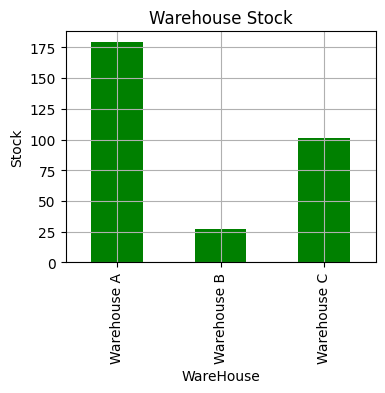

In [28]:
position_df.plot(kind='bar', title="Warehouse Stock", color="green", figsize=(4, 3))
plt.xlabel("WareHouse")
plt.ylabel("Stock")
plt.grid()

In [29]:
df['Profit'] = df['SellingPrice'] - df['CostPrice']
df.head(3)

,sku,ProductName,Category,SubCategory,Brand,CostPrice,SellingPrice,Stock,RecorderLevel,SupplierID,WareHouse,Profit
0,SKU001,Laptop Pro 15,Electronics,Computers,TechBrand,800.0,1299.99,15,5,SUP001,Warehouse A,499.99
1,SKU002,Wireless Mouse,Electronics,Accessories,TechBrand,12.5,29.99,45,10,SUP001,Warehouse A,17.49
2,SKU003,Office Chair Executive,Furniture,Seating,ComfortPlus,120.0,249.99,8,3,SUP002,Warehouse B,129.99


In [30]:
df['UnderStocked'] = df['Stock'] < df['RecorderLevel']
df['UnderStocked'].head(3)

,UnderStocked
0,False
1,False
2,False


In [31]:
brand_df = (
    df.groupby('Brand')['RecorderLevel']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
brand_df

,RecorderLevel
Brand,
WriteWell,25
TechBrand,23
PaperCo,20
HomeStyle,15
EcoBottle,12


# 📊 Visualization 2: Top 5 Brands
Top 5 brands by sales.

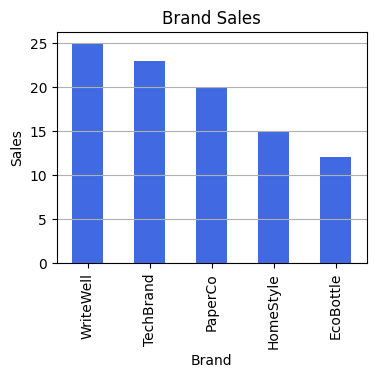

In [32]:
brand_df.plot(kind='bar', title="Brand Sales", color="royalblue", figsize=(4, 3))
plt.xlabel("Brand")
plt.ylabel("Sales")
plt.grid(axis='y')

📈Visualization 3: Average Profit per Brand

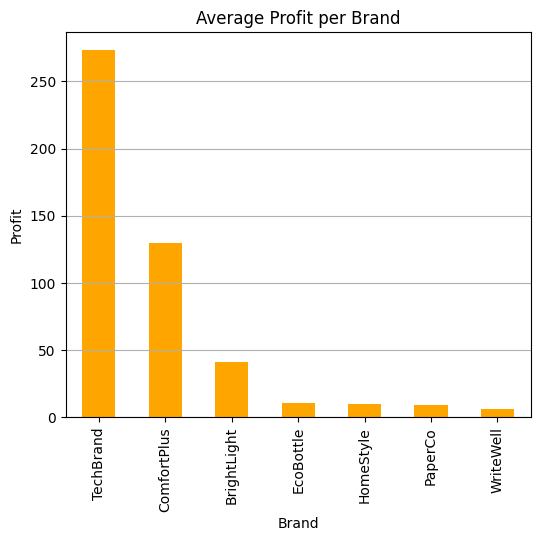

In [33]:
profit_brand = df.groupby('Brand')['Profit'].mean().sort_values(ascending=False)
profit_brand.plot(kind='bar', title="Average Profit per Brand", color="orange", figsize=(6, 5))
plt.xlabel("Brand")
plt.ylabel("Profit")
plt.grid(axis='y')

# 📊 Visualization 4: Sales Share by Category
Pie chart showing sales contribution of each category.




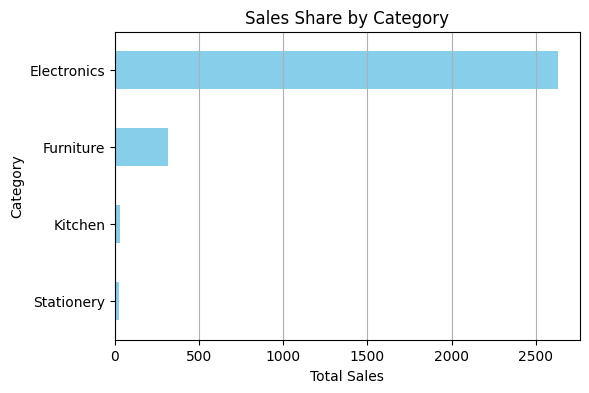

In [34]:
category_sales = df.groupby('Category')['SellingPrice'].sum()
category_sales.sort_values().plot(
    kind='barh',
    figsize=(6,4),
    color="skyblue",
    title="Sales Share by Category"
)
plt.xlabel("Total Sales")
plt.grid(axis='x')
plt.show()